# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
import random

%matplotlib inline

In [2]:
df = pd.read_excel("Churn.xlsx")
print(df.shape)
df.head()

(7043, 13)


,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,70,1,Offer E,3,1,0,4,Month-to-Month,8,80.65,1024.10,1
2,71,70,3,Offer D,2,0,2,4,Month-to-Month,18,95.45,1910.88,1
3,78,70,1,Offer C,2,2,2,4,Month-to-Month,25,98.50,2995.07,1
4,80,80,1,Offer C,2,0,0,4,Month-to-Month,37,76.50,3102.36,1


# 전처리

## Label Encoding

In [3]:
df['Membership'] = df['Membership'].map({'None': 0, 'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5})
df['Contract'] = df['Contract'].map({'Month-to-Month': 1, 'One Year': 12, 'Two Year': 24}) 

df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,70,0,0,3,1,1,2,1,1,39.65,59.65,1
1,74,70,1,5,3,1,0,4,1,8,80.65,1024.10,1
2,71,70,3,4,2,0,2,4,1,18,95.45,1910.88,1
3,78,70,1,3,2,2,2,4,1,25,98.50,2995.07,1
4,80,80,1,3,2,0,0,4,1,37,76.50,3102.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,30,0,0,5,0,0,1,24,72,21.15,3039.53,0
7039,38,30,2,3,3,3,2,2,12,24,84.80,2807.47,0
7040,30,30,2,0,4,2,2,4,12,72,103.20,9453.04,0
7041,32,30,2,0,4,1,0,2,1,11,29.60,319.21,0


## 정규화

In [4]:
from sklearn.preprocessing import MinMaxScaler

final_df = df.copy()

scaled_cols = df.columns[:-1]

# MinMaxScaler를 사용한 정규화
scaler = MinMaxScaler()
final_df[scaled_cols] = scaler.fit_transform(final_df[scaled_cols])
final_df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,0.967213,0.857143,0.000000,0.0,0.50,0.25,0.5,0.333333,0.000000,0.000000,0.212935,0.003202,1
1,0.901639,0.857143,0.111111,1.0,0.50,0.25,0.0,1.000000,0.000000,0.098592,0.620896,0.083855,1
2,0.852459,0.857143,0.333333,0.8,0.25,0.00,1.0,1.000000,0.000000,0.239437,0.768159,0.158013,1
3,0.967213,0.857143,0.111111,0.6,0.25,0.50,1.0,1.000000,0.000000,0.338028,0.798507,0.248680,1
4,1.000000,1.000000,0.111111,0.6,0.25,0.00,0.0,1.000000,0.000000,0.507042,0.579602,0.257652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.180328,0.285714,0.000000,0.0,1.00,0.00,0.0,0.000000,1.000000,1.000000,0.028856,0.252398,0
7039,0.311475,0.285714,0.222222,0.6,0.50,0.75,1.0,0.333333,0.478261,0.323944,0.662189,0.232992,0
7040,0.180328,0.285714,0.222222,0.0,0.75,0.50,1.0,1.000000,0.478261,1.000000,0.845274,0.788735,0
7041,0.213115,0.285714,0.222222,0.0,0.75,0.25,0.0,0.333333,0.000000,0.140845,0.112935,0.024908,0


# 학습/테스트셋 분리

In [5]:
from sklearn.model_selection import train_test_split

y_target = final_df['Churn Value']
X_data = final_df.drop(['Churn Value'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=156)


# 모델 학습

## RandomForest

* cv = 2~5로 학습했을 때 정확도

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# cv 값 리스트 정의
cv_values = [2, 3, 4, 5]

# 결과를 저장할 데이터프레임 생성
cv_results = pd.DataFrame(columns=['cv', 'best_params', 'best_score'])

for cv in cv_values:
    # RandomForestClassifier 모델 생성
    rf_clf = RandomForestClassifier(random_state=42)

    # GridSearchCV 수행
    params = {'n_estimators': [100],
              'max_depth': [6, 8, 10, 12],
              'min_samples_leaf': [8, 12, 18],
              'min_samples_split': [8, 16, 20]}
    
    rf_grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=cv, n_jobs=-1)
    rf_grid_cv.fit(X_train, y_train)

    # 결과 저장
    cv_results = cv_results.append({'cv': cv,
                                    'best_params': rf_grid_cv.best_params_,
                                    'best_score': rf_grid_cv.best_score_}, ignore_index=True)

cv_results

,cv,best_params,best_score
0,2,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.954029
1,3,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.956869
2,4,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.956516
3,5,"{'max_depth': 12, 'min_samples_leaf': 8, 'min_...",0.955982


* cv = 3로 학습

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators':[100], # 결정 트리 개수 지정
    'max_depth' : [6, 8, 10, 12], # 트리의 최대 깊이 지정
    'min_samples_leaf' : [8, 12, 18 ], # 분할된 경우 왼쪽, 오른쪽의 브랜치 노드에서 가져가야 할 최소한의 샘플 데이터 수
    'min_samples_split' : [8, 16, 20] # 노드를 분할하기 위한 최소한의 샘플 데이터 수 => 과적합 제어
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=3, n_jobs=-1 )
rf_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', rf_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(rf_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9569


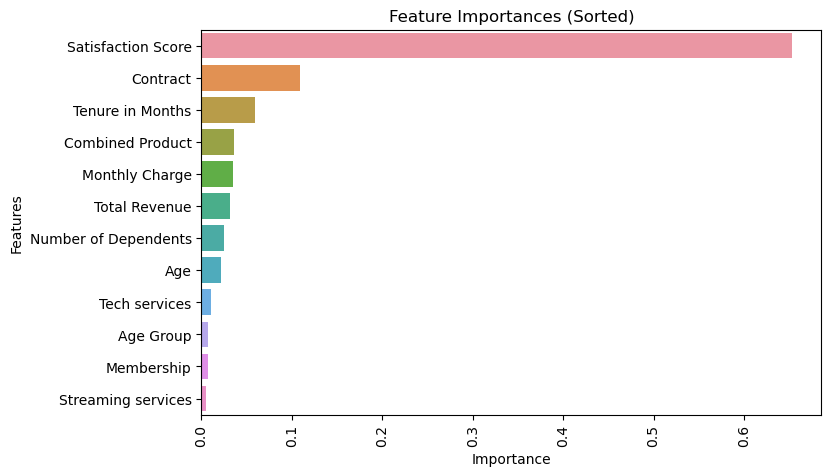

In [11]:
best_rf_model = rf_grid_cv.best_estimator_

best_rf_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_rf_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

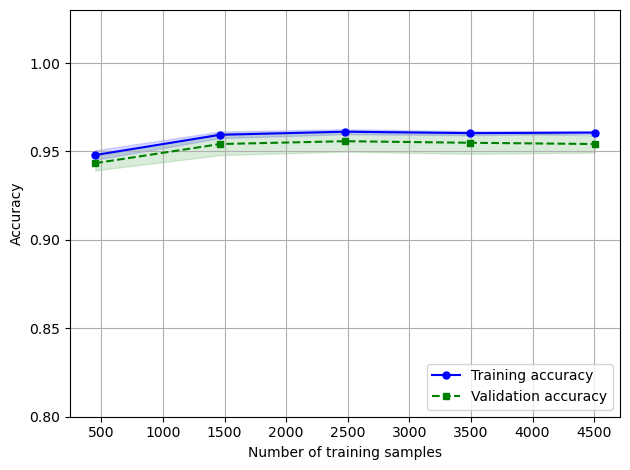

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# learning_curve를 그리기 위한 cv 값을 늘립니다.
train_sizes, train_scores, test_scores = learning_curve(estimator=best_rf_model, X=X_train, y=y_train, cv=5, n_jobs=-1)

train_sizes = train_sizes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## DecisionTree

* cv = 2~5로 학습했을 때의 정확도

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# cv 값 리스트 정의
cv_values = [2, 3, 4, 5]

# 결과를 저장할 데이터프레임 생성
cv_results = pd.DataFrame(columns=['cv', 'best_params', 'best_score'])

for cv in cv_values:
    # DecisionTreeClassifier 모델 생성
    dt_clf = DecisionTreeClassifier(random_state=42)

    # GridSearchCV 수행
    parameters = {'max_depth': [2, 3, 5, 10],
                  'min_samples_split': [2, 3, 5],
                  'min_samples_leaf': [1, 5, 8]}
    
    dt_grid_cv = GridSearchCV(dt_clf, param_grid=parameters, cv=cv, n_jobs=-1)
    dt_grid_cv.fit(X_train, y_train)

    # 결과 저장
    cv_results = cv_results.append({'cv': cv,
                                    'best_params': dt_grid_cv.best_params_,
                                    'best_score': dt_grid_cv.best_score_}, ignore_index=True)

cv_results

,cv,best_params,best_score
0,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.951544
1,3,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.947107
2,4,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.950125
3,5,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.949592


* cv = 2로 학습

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=42)

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}

# DecisionTreeClassifier 객체 생성 후 GridSearchCV 수행
dt_grid_cv = GridSearchCV(dt_clf , param_grid=parameters , cv=2, n_jobs=-1 )
dt_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', dt_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(dt_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.9515


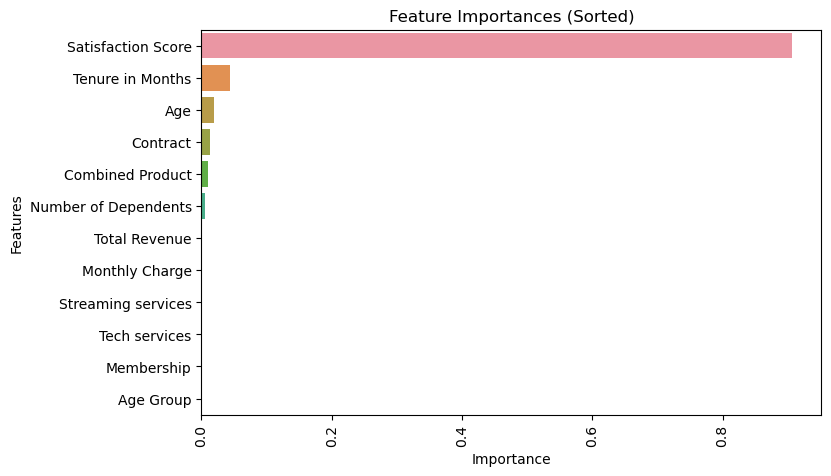

In [20]:
best_dt_model = dt_grid_cv.best_estimator_

best_dt_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_dt_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

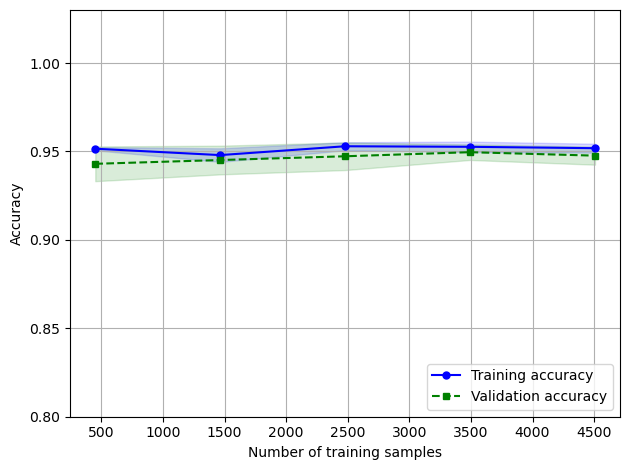

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# learning_curve를 그리기 위한 cv 값을 늘립니다.
train_sizes, train_scores, test_scores = learning_curve(estimator=best_dt_model, X=X_train, y=y_train, cv=5, n_jobs=-1)

train_sizes = train_sizes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## GradientBoosting

* cv = 2로 학습

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=42)

# 랜덤 시드 설정
random_seed = 42
np.random.seed(random_seed)

params = {
    'n_estimators':[100], # 결정 트리 개수 지정
    'max_depth' : [6, 8, 10, 12], # 트리의 최대 깊이 지정
    'min_samples_leaf' : [8, 12, 18,20,24 ], # 분할된 경우 왼족, 오른쪽의 브랜치 노드에서 가져가야 할 최소한의 샘플 데이터 수
    'min_samples_split' : [8, 16, 20,22,26], # 노드를 분할하기 위한 최소한의 샘플 데이터 수 => 과적합 제어
     'learning_rate' :[random.uniform(0.01, 0.1) for _ in range(5)]    
}


gb_grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2, n_jobs=-1 )
gb_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', gb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gb_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.05968249817166032, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9549


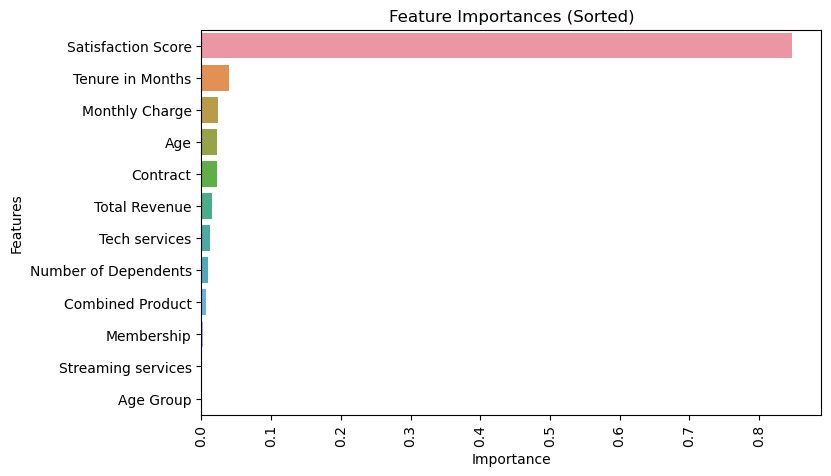

In [23]:
best_gb_model = gb_grid_cv.best_estimator_

best_gb_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_gb_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

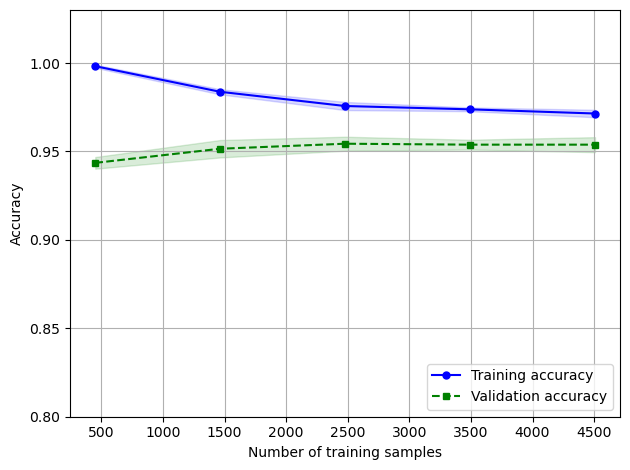

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# learning_curve를 그리기 위한 cv 값을 늘립니다.
train_sizes, train_scores, test_scores = learning_curve(estimator=best_gb_model, X=X_train, y=y_train, cv=5, n_jobs=-1)

train_sizes = train_sizes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## XGBoost

* cv = 2~5로 학습했을 때의 정확도

In [25]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# cv 값 리스트 정의
cv_values = [2, 3, 4, 5]

# 결과를 저장할 데이터프레임 생성
cv_results = pd.DataFrame(columns=['cv', 'best_params', 'best_score'])

for cv in cv_values:
    # XGBoostClassifier 모델 생성
    XG_clf = XGBClassifier(random_state=101, objective='binary:logistic')

    # GridSearchCV 수행
    params = {'n_estimators': [100, 200, 300, 400],
              'learning_rate': [0.1, 0.2, 0.3, 0.4],
              'min_child_weight': [1, 2, 3, 4, 5],
              'max_depth': [1, 2, 3, 4, 5]}
    
    xg_grid_cv = GridSearchCV(XG_clf, param_grid=params, cv=cv, n_jobs=-1)
    xg_grid_cv.fit(X_train, y_train)

    # 결과 저장
    cv_results = cv_results.append({'cv': cv,
                                    'best_params': xg_grid_cv.best_params_,
                                    'best_score': xg_grid_cv.best_score_}, ignore_index=True)

cv_results

,cv,best_params,best_score
0,2,"{'learning_rate': 0.1, 'max_depth': 4, 'min_ch...",0.956692
1,3,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.955449
2,4,"{'learning_rate': 0.1, 'max_depth': 2, 'min_ch...",0.956870
3,5,"{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",0.956869


* cv = 4로 학습

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import random

XG_clf = XGBClassifier(random_state=101, objective='binary:logistic')

params = {'n_estimators':[100,200,300,400], 
           'learning_rate' :[0.1, 0.2, 0.3, 0.4],
          'min_child_weight' : [1,2,3,4,5],
          'max_depth' : [1,2,3,4,5]}

xg_grid_cv = GridSearchCV(XG_clf , param_grid=params , cv=4, n_jobs=-1 )
xg_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', xg_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(xg_grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 200}
최고 예측 정확도: 0.9569


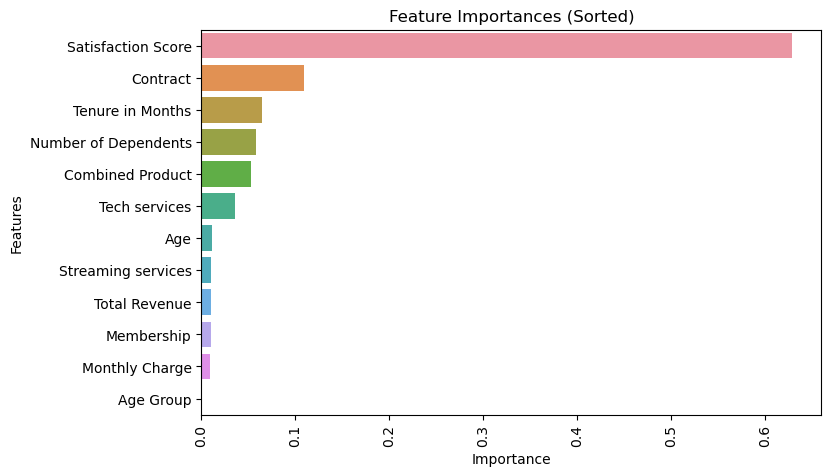

In [27]:
best_xg_model = xg_grid_cv.best_estimator_

best_xg_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_xg_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

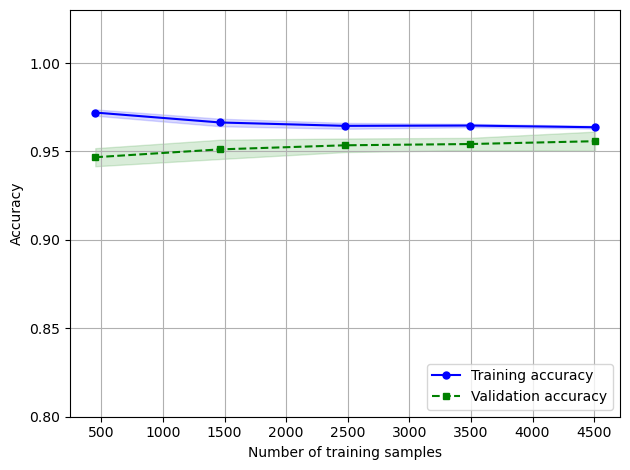

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# learning_curve를 그리기 위한 cv 값을 늘립니다.
train_sizes, train_scores, test_scores = learning_curve(estimator=best_xg_model, X=X_train, y=y_train, cv=5, n_jobs=-1)

train_sizes = train_sizes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## LightGBM

* cv =2~5로 학습했을 때 정확도

In [29]:
import lightgbm as lgb
import pandas as pd

# cv 값 리스트 정의
cv_values = [2, 3, 4, 5]

# 결과를 저장할 데이터프레임 생성
cv_results = pd.DataFrame(columns=['cv', 'best_params', 'best_score'])

for cv in cv_values:
    # LGBMClassifier 모델 생성
    lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

    # GridSearchCV 수행
    params = {'num_leaves': [8, 12, 18, 20, 24],
              'min_data_in_leaf': [8, 12, 18, 20, 24],
              'max_depth': [2, 3, 5, 10]}
    
    lgb_grid_cv = GridSearchCV(lgb_clf, param_grid=params, cv=cv, n_jobs=-1)
    lgb_grid_cv.fit(X_train, y_train)

    # 결과 저장
    cv_results = cv_results.append({'cv': cv,
                                    'best_params': lgb_grid_cv.best_params_,
                                    'best_score': lgb_grid_cv.best_score_}, ignore_index=True)
    
cv_results

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

,cv,best_params,best_score
0,2,"{'max_depth': 3, 'min_data_in_leaf': 24, 'num_...",0.956692
1,3,"{'max_depth': 3, 'min_data_in_leaf': 18, 'num_...",0.956337
2,4,"{'max_depth': 2, 'min_data_in_leaf': 12, 'num_...",0.955805
3,5,"{'max_depth': 3, 'min_data_in_leaf': 24, 'num_...",0.956514


* cv = 2로 학습

In [30]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', lgb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(lgb_grid_cv.best_score_))

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

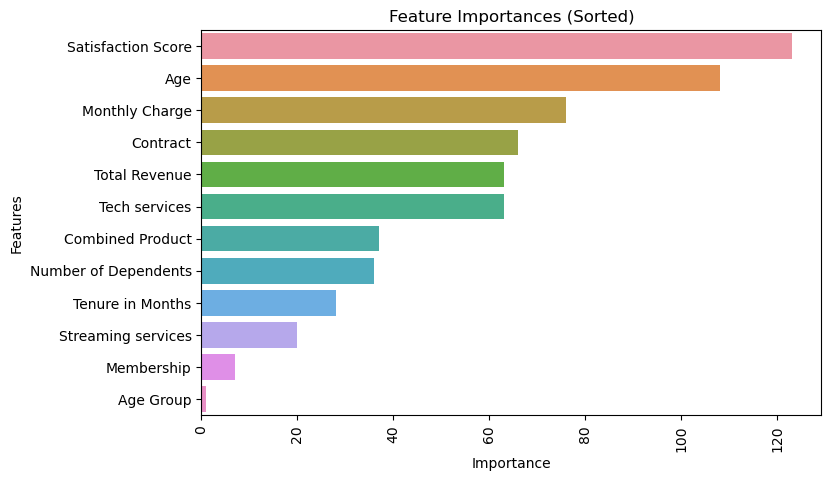

In [31]:
best_lgb_model = lgb_grid_cv.best_estimator_

best_lgb_model.fit(X_train , y_train)
feature_names = final_df.columns[:-1]

# 학습된 모델을 사용하여 피처 중요도를 얻습니다.
feature_importances = best_lgb_model.feature_importances_

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()

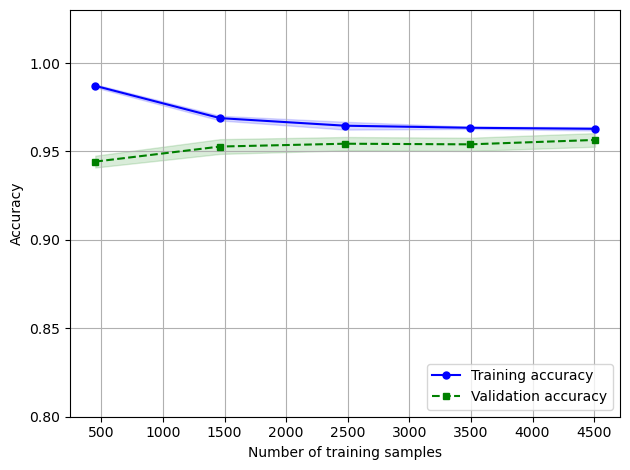

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# learning_curve를 그리기 위한 cv 값을 늘립니다.
train_sizes, train_scores, test_scores = learning_curve(estimator=best_lgb_model, X=X_train, y=y_train, cv=5, n_jobs=-1)

train_sizes = train_sizes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## CatBoost

In [33]:
from catboost import CatBoostClassifier, Pool
cb_clf = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
cb_clf.fit(X_train, y_train)

# 모델을 사용하여 테스트 데이터에 대한 예측 수행
y_pred = cb_clf.predict(X_test)

# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('모델의 정확도:', accuracy)

0:	learn: 0.2675860	total: 147ms	remaining: 147ms
1:	learn: 0.1827961	total: 148ms	remaining: 0us
모델의 정확도: 0.9453513129879347


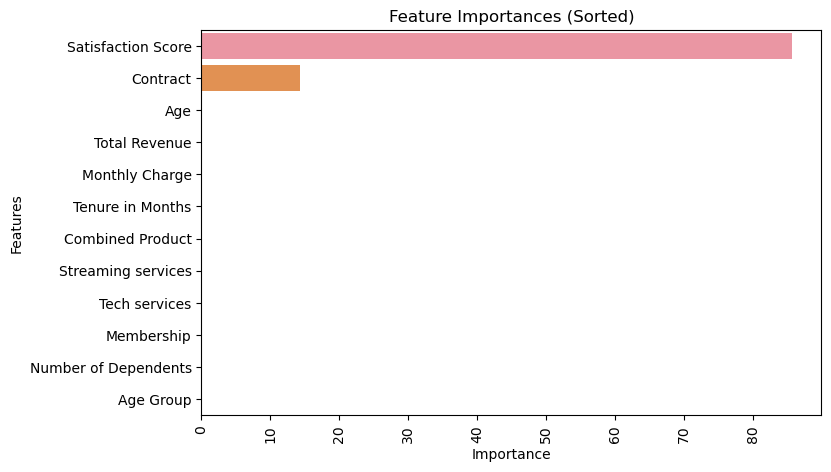

In [34]:
import matplotlib.pyplot as plt

# 모델의 피처 중요도 가져오기
feature_importance = cb_clf.get_feature_importance(type='FeatureImportance')

# 피처 이름 가져오기 (예시: X_train의 열 이름)
feature_names = final_df.columns[:-1]

# 피처 중요도를 기준으로 내림차순으로 정렬합니다.
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importance[sorted_idx]

# 피처 중요도를 시각화합니다.
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_names)
plt.title("Feature Importances (Sorted)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.show()


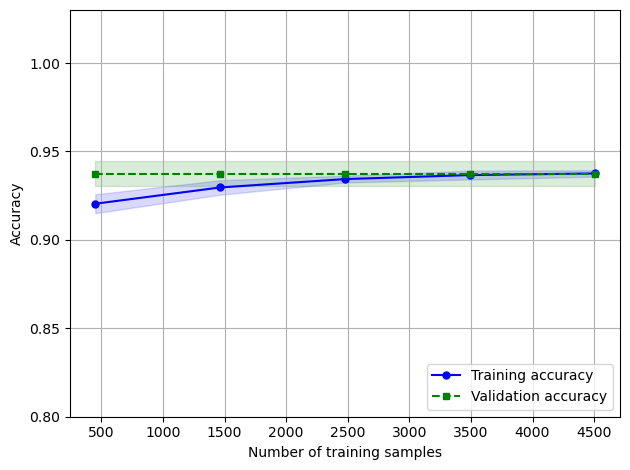

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# learning_curve를 그리기 위한 cv 값을 늘립니다.
train_sizes, train_scores, test_scores = learning_curve(estimator=cb_clf, X=X_train, y=y_train, cv=5, n_jobs=-1)

train_sizes = train_sizes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

# 모델 선택

* **RandomForest : 0.9569 (cv=3)**
* DecisionTree : 0.9515 (cv=2)
* GradientBoosting : 0.9549 (cv=2)
* **XGBoost : 0.9569 (cv=4)**
* **LightGBM : 0.9567 (cv=2)**
* CatBoost : 0.9453513129879347 (교차검증X)

# 모델 적용

## 가상고객 데이터프레임 만들기

In [77]:
import pandas as pd

# 빈 데이터프레임 생성
test_df = pd.DataFrame()

test_df['Age'] = np.random.randint(19, 81, 100)
test_df['Age Group'] = test_df['Age'] // 10
test_df['Number of Dependents'] = np.random.randint(0, 6, 100)
test_df['Membership'] = np.random.randint(0, 6, 100)
test_df['Satisfaction Score'] = np.random.randint(1, 6, 100)
test_df['Tech services'] = np.random.randint(0, 5, 100)
test_df['Streaming services'] = np.random.randint(0, 3, 100)
test_df['Combined Product'] = np.random.randint(1, 5, 100)
test_df['Contract'] = np.random.choice([1, 12, 24], size=100)
test_df['Tenure in Months'] = np.random.randint(1, 73, 100)
test_df['Monthly Charge'] = np.random.randint(18, 119, 100)

# 'Total Revenue' 컬럼 생성
random_values = np.random.randint(-50, 151, size=100)
revenues = (test_df['Tenure in Months'] * test_df['Monthly Charge']) - random_values
test_df['Total Revenue'] = np.maximum(revenues, 0)

test_df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue
0,73,7,2,5,5,3,2,4,12,20,21,403
1,20,2,3,3,3,2,2,3,12,39,34,1254
2,72,7,2,5,4,4,0,2,24,4,21,0
3,36,3,0,0,5,2,0,3,1,19,60,1078
4,35,3,5,4,2,1,1,1,1,45,107,4768
...,...,...,...,...,...,...,...,...,...,...,...,...
95,42,4,3,5,1,2,1,2,1,33,75,2414
96,67,6,5,4,3,4,2,4,24,1,50,23
97,39,3,4,2,5,1,2,2,24,53,76,3910
98,69,6,1,4,3,4,0,4,1,60,112,6607


정규화

In [79]:
from sklearn.preprocessing import MinMaxScaler

final_test_df = test_df.copy()

scaled_cols = test_df.columns

# MinMaxScaler를 사용한 정규화
scaler = MinMaxScaler()
final_test_df[scaled_cols] = scaler.fit_transform(final_test_df[scaled_cols])
final_test_df

,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue
0,0.885246,0.857143,0.4,1.0,1.00,0.75,1.0,1.000000,0.478261,0.267606,0.03,0.059326
1,0.016393,0.142857,0.6,0.6,0.50,0.50,1.0,0.666667,0.478261,0.535211,0.16,0.184602
2,0.868852,0.857143,0.4,1.0,0.75,1.00,0.0,0.333333,1.000000,0.042254,0.03,0.000000
3,0.278689,0.285714,0.0,0.0,1.00,0.50,0.0,0.666667,0.000000,0.253521,0.42,0.158693
4,0.262295,0.285714,1.0,0.8,0.25,0.25,0.5,0.000000,0.000000,0.619718,0.89,0.701899
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.377049,0.428571,0.6,1.0,0.00,0.50,0.5,0.333333,0.000000,0.450704,0.57,0.355366
96,0.786885,0.714286,1.0,0.8,0.50,1.00,1.0,1.000000,1.000000,0.000000,0.32,0.003386
97,0.327869,0.285714,0.8,0.4,1.00,0.25,1.0,0.333333,1.000000,0.732394,0.58,0.575593
98,0.819672,0.714286,0.2,0.8,0.50,1.00,0.0,1.000000,0.000000,0.830986,0.94,0.972619


## 가상고객 데이터프레임 적용

최적의 모델 가져오기 (Lightgbm, cv=2)

In [67]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

best_lgb_model = lgb_grid_cv.best_estimator_
best_lgb_model.fit(X_train , y_train)

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(max_depth=3, min_data_in_leaf=24, num_leaves=8,
               objective='binary', random_state=101)

In [80]:
# 필요한 컬럼 선택
columns_to_use = final_test_df.columns
test_data = final_test_df[columns_to_use]


# 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
predicted_probabilities = best_lgb_model.predict_proba(test_data)

# 결과를 데이터프레임에 추가
test_df['이탈점수'] = predicted_probabilities[:, 1]*100  # 클래스 1의 확률을 선택

# 데이터프레임 확인
test_df

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24


,Age,Age Group,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,이탈점수
0,73,7,2,5,5,3,2,4,12,20,21,403,0.054832
1,20,2,3,3,3,2,2,3,12,39,34,1254,1.076304
2,72,7,2,5,4,4,0,2,24,4,21,0,0.063229
3,36,3,0,0,5,2,0,3,1,19,60,1078,0.042569
4,35,3,5,4,2,1,1,1,1,45,107,4768,99.844696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,42,4,3,5,1,2,1,2,1,33,75,2414,99.815806
96,67,6,5,4,3,4,2,4,24,1,50,23,1.449949
97,39,3,4,2,5,1,2,2,24,53,76,3910,0.045503
98,69,6,1,4,3,4,0,4,1,60,112,6607,0.969529


<AxesSubplot:xlabel='이탈점수', ylabel='Density'>

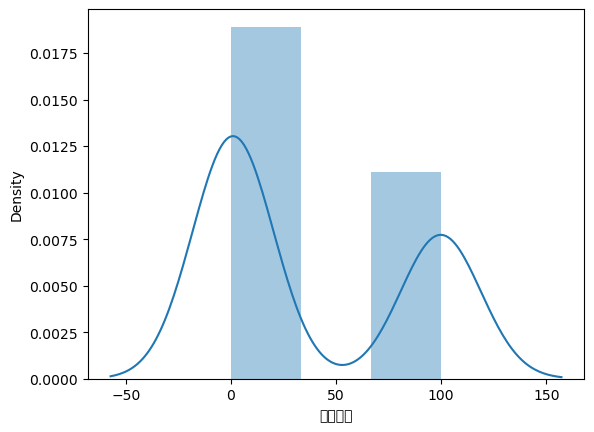

In [81]:
sns.distplot(test_df["이탈점수"])

In [50]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=101, objective='binary')

params = {'num_leaves' : [8, 12, 18,20,24 ], 'min_data_in_leaf' : [8, 12, 18,20,24 ], 'max_depth' : [2, 3, 5, 10] }

lgb_grid_cv = GridSearchCV(lgb_clf , param_grid=params , cv=2, n_jobs=-1 )
lgb_grid_cv.fit(X_train , y_train)

best_lgb_model = lgb_grid_cv.best_estimator_
best_lgb_model.fit(X_train , y_train)

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1503, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266773 -> initscore=-1.011056
[LightGBM] [Info] Start training from score -1.011056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LGBMClassifier(max_depth=3, min_data_in_leaf=24, num_leaves=8,
               objective='binary', random_state=101)

In [59]:
# 최적의 모델을 사용하여 테스트 데이터를 예측합니다.
test_data = [[0.409836, 0.428571, 0.111111, 0.6, 0.5, 0.0, 1.0, 0.333333,  0.478261, 0.098592, 0.620896, 0.083855], 
            [0.213115, 0.285714, 0.222222, 1.0,  0.5, 0.75, 0.5, 1.000000, 0.000000, 1.000000, 0.028856, 0.252398], 
            [0.180328, 0.285714, 0.333333, 0.6,  0.5, 0.5, 1.0, 1.000000, 0.478261, 0.507042, 0.579602, 0.257652], 
            [0.311475, 0.285714, 0.111111, 0.8, 0.5, 0.25, 0.0, 0.333333, 1.000000, 0.338028, 0.798507, 0.248680], 
            [0.967213, 0.857143, 0.222222, 0.0, 0.5, 0.5, 0.5, 0.333333, 1.000000, 0.239437, 0.768159, 0.158013]] 

# 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
predicted_proba = best_lgb_model.predict_proba(test_data)

# 각 테스트 데이터에 대한 클래스 1일 확률을 출력합니다.
for i, data in enumerate(test_data, start=1):
    predicted_proba = best_lgb_model.predict_proba([data])
    probability_of_class_1 = predicted_proba[0][1]
    print(f"테스트 데이터 {i}의 가상 고객이 이탈할 확률:", probability_of_class_1)
    print(f"테스트 데이터 {i}의 가상 고객 이탈 점수:", int(probability_of_class_1 * 100), "점")


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
테스트 데이터 1의 가상 고객이 이탈할 확률: 0.05313422777409051
테스트 데이터 1의 가상 고객 이탈 점수: 5 점
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
테스트 데이터 2의 가상 고객이 이탈할 확률: 0.007055922964239947
테스트 데이터 2의 가상 고객 이탈 점수: 0 점
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
테스트 데이터 3의 가상 고객이 이탈할 확률: 0.021865323321966355
테스트 데이터 3의 가상 고객 이탈 점수: 2 점
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
테스트 데이터 4의 가상 고객이 이탈할 확률: 0.01194917960187955
테스트 데이터 4의 가상 고객 이탈 점수: 1 점
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Curre

In [60]:
final_df.columns

Index(['Age', 'Age Group', 'Number of Dependents', 'Membership',
       'Satisfaction Score', 'Tech services', 'Streaming services',
       'Combined Product', 'Contract', 'Tenure in Months', 'Monthly Charge',
       'Total Revenue', 'Churn Value'],
      dtype='object')